# Todesfälle bei Alkohol- und Drogenmissbrauch





### Gruppe: Carmen, Joyce, Mcqulat
 
#### Fragestellung:
Welche sozialen, geografischen und ökonomischen Faktoren korrelieren mit der Häufigkeit von Alkohol- und Drogenbedingten Todesfällen (sechs Kontinente) über die Zeitspanne von 2000-2021? 
  
#### Datenquelle:
- https://ourworldindata.org/grapher/death-rates-substance-disorders-who




### 1. Daten beschaffen und laden

In [560]:
# Bibliothek

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [561]:
# Datensatz
df_orig = pd.read_csv("Datensatz.csv", names=["Gebiet", "ID", "Jahr", "Sterberate_drogenkonsum"], skiprows=1)
df_orig

,Gebiet,ID,Jahr,Sterberate_drogenkonsum
0,Afghanistan,AFG,2000,1.372769
1,Afghanistan,AFG,2001,1.395729
2,Afghanistan,AFG,2002,1.375031
3,Afghanistan,AFG,2003,1.387097
4,Afghanistan,AFG,2004,1.403695
...,...,...,...,...
4417,Zimbabwe,ZWE,2017,0.696490
4418,Zimbabwe,ZWE,2018,0.746735
4419,Zimbabwe,ZWE,2019,0.732875
4420,Zimbabwe,ZWE,2020,0.745262


In [562]:
# Kontinent
contintents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]
df_continents = df_orig[df_orig['Gebiet'].isin(contintents)]
df_continents

,Gebiet,ID,Jahr,Sterberate_drogenkonsum
22,Africa,NaN,2000,1.028038
23,Africa,NaN,2001,1.024833
24,Africa,NaN,2002,1.037203
25,Africa,NaN,2003,1.037875
26,Africa,NaN,2004,1.029823
...,...,...,...,...
3691,South America,NaN,2017,2.490394
3692,South America,NaN,2018,2.485325
3693,South America,NaN,2019,2.390907
3694,South America,NaN,2020,2.957083


In [563]:
# Kontinent 2
years = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
df_years = df_orig[df_orig['Gebiet'].isin(years)]
df_continents

,Gebiet,ID,Jahr,Sterberate_drogenkonsum
22,Africa,NaN,2000,1.028038
23,Africa,NaN,2001,1.024833
24,Africa,NaN,2002,1.037203
25,Africa,NaN,2003,1.037875
26,Africa,NaN,2004,1.029823
...,...,...,...,...
3691,South America,NaN,2017,2.490394
3692,South America,NaN,2018,2.485325
3693,South America,NaN,2019,2.390907
3694,South America,NaN,2020,2.957083


## 2. Daten vorbereiten 
- Die Rohdaten werden als Long-Format visulaisiert
- Für die Analyse wurde für jeden Kontient dei Daten pivotiert

In [564]:
# Pivot Alle
df_pivot = df_orig.pivot(index='Gebiet', columns='Jahr', values='Sterberate_drogenkonsum')
df_pivot

Jahr,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.372769,1.395729,1.375031,1.387097,1.403695,1.403987,1.388047,1.365308,1.334761,1.272544,...,1.353126,1.368210,1.371491,1.353963,1.369290,1.427865,1.446979,1.453580,1.454035,1.541018
Africa,1.028038,1.024833,1.037203,1.037875,1.029823,1.015446,1.024987,1.023400,1.044850,1.054400,...,1.071226,1.074564,1.078596,1.091034,1.094272,1.107987,1.135993,1.146920,1.127753,1.215895
Albania,1.374281,1.248409,1.290197,1.337863,1.370391,2.170059,2.187860,2.293278,2.305459,2.336419,...,1.467054,1.483883,1.432683,1.382836,1.399483,1.354467,1.316988,1.265535,1.085861,0.878898
Algeria,1.352478,1.367938,1.383476,1.354104,1.331860,1.337907,1.325494,1.306768,1.291366,1.279547,...,1.213428,1.221611,1.210624,1.193405,1.172652,1.183668,1.214825,1.220362,1.010295,1.393704
Andorra,0.574747,0.619095,0.606762,0.568113,0.623782,0.576116,0.598198,0.588333,0.578392,0.568497,...,0.534948,0.588359,0.586232,0.599170,0.620151,0.568697,0.559746,0.589306,0.733374,0.392122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1.231501,1.260809,1.282428,1.296814,1.326259,1.375344,1.411215,1.517609,1.623394,1.694277,...,1.879435,1.940095,2.025680,2.097853,2.111471,2.106813,2.136053,2.181146,2.000938,2.132299
World,3.816866,3.847529,3.908566,3.936510,3.940024,3.997463,3.823536,3.681023,3.631181,3.463880,...,3.245137,3.265316,3.359563,3.423905,3.574148,3.652893,3.642295,3.660673,4.014630,4.231057
Yemen,1.051388,1.073108,1.079414,1.073120,1.070639,1.081767,1.064221,1.138615,1.162073,1.156158,...,1.144398,1.161318,1.197371,1.185557,1.254594,1.230789,1.216186,1.172865,1.061639,1.222013


In [565]:
# Pivot Kontinet
df_pivot = df_continents.pivot(index='Gebiet', columns='Jahr', values='Sterberate_drogenkonsum')
df_pivot.head()

Jahr,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gebiet,,,,,,,,,,,,,,,,,,,,,
Africa,1.028038,1.024833,1.037203,1.037875,1.029823,1.015446,1.024987,1.023400,1.044850,1.054400,...,1.071226,1.074564,1.078596,1.091034,1.094272,1.107987,1.135993,1.146920,1.127753,1.215895
Asia,2.098514,2.027772,1.986144,1.948191,1.954247,1.941535,1.901419,1.885871,1.876298,1.848902,...,1.766062,1.755328,1.764280,1.765292,1.777003,1.818136,1.845138,1.873058,1.841871,1.810710
Europe,14.587547,15.258791,15.767808,16.142710,16.129038,16.404879,14.749776,13.789412,13.359900,12.107398,...,10.250076,10.205623,10.623964,10.449649,10.424955,10.087612,10.205506,9.904937,9.599533,9.828240
North America,6.429989,6.685980,7.333654,7.705354,7.954963,8.577537,9.310800,9.070653,9.241040,9.284315,...,10.096892,10.656885,11.453345,12.648228,14.695362,16.041958,15.653575,16.263073,21.376522,24.205437
Oceania,5.447703,3.403300,3.259770,3.385526,3.324893,3.700018,3.295572,3.481835,3.872326,4.086673,...,3.904985,3.830023,4.481861,4.640277,4.875943,4.986824,4.822925,4.806808,4.794689,4.549628


In [566]:
#Africa
africa = df_pivot.loc[['Africa']]
print(africa)

#Asia
asia = df_pivot.loc[['Asia']]
print(asia)

#Europe
europe = df_pivot.loc[['Europe']]
print(europe)

#North America
northamerica = df_pivot.loc[['North America']]
print(northamerica)

#Oceania
oceania = df_pivot.loc[['Oceania']]
print(oceania)

#South America
southamerica = df_pivot.loc[['South America']]
print(southamerica)

Jahr        2000      2001      2002      2003      2004      2005      2006  \
Gebiet                                                                         
Africa  1.028038  1.024833  1.037203  1.037875  1.029823  1.015446  1.024987   

Jahr      2007     2008    2009  ...      2012      2013      2014      2015  \
Gebiet                           ...                                           
Africa  1.0234  1.04485  1.0544  ...  1.071226  1.074564  1.078596  1.091034   

Jahr        2016      2017      2018     2019      2020      2021  
Gebiet                                                             
Africa  1.094272  1.107987  1.135993  1.14692  1.127753  1.215895  

[1 rows x 22 columns]
Jahr        2000      2001      2002      2003      2004      2005      2006  \
Gebiet                                                                         
Asia    2.098514  2.027772  1.986144  1.948191  1.954247  1.941535  1.901419   

Jahr        2007      2008      2009  ...      201

In [567]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Beispiel-Daten für df_pivot (Bitte durch echte Daten ersetzen)
# import numpy as np
# years = range(2000, 2022)
# continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
# np.random.seed(42)
# data = {continent: np.random.uniform(50, 200, len(years)) for continent in continents}
# df_pivot = pd.DataFrame(data, index=years)

# # Kontinente, die dargestellt werden sollen
# continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

# # Farben für die Kontinente
# colors = ['b', 'g', 'r', 'c', 'm', 'y']

# plt.figure(figsize=(14, 8))
# for i, continent in enumerate(continents):
#     if continent in df_pivot.columns:
#         # Daten für den Kontinent vorbereiten
#         data = df_pivot[[continent]].reset_index()
#         data.columns = ['Jahr', 'Sterberate']

#         # Linie plotten
#         plt.plot(
#             data['Jahr'], 
#             data['Sterberate'], 
#             marker='o', 
#             color=colors[i], 
#             label=f"Todesrate in {continent}"
#         )

#         # Zahlenwerte auf den Linien hinzufügen
#         for x, y in zip(data['Jahr'], data['Sterberate']):
#             plt.text(x, y, f"{y:.1f}", fontsize=8, ha='center', va='bottom')

# # Titel und Achsenbeschriftung hinzufügen
# plt.title("Todesraten nach Kontinenten (2000-2021) pro 100.000 Menschen", fontsize=16)
# plt.xlabel("Jahr", fontsize=14)
# plt.ylabel("Todesrate (pro 100.000 Menschen)", fontsize=14)

# # Einheitliche Y-Achse für bessere Vergleichbarkeit
# plt.ylim(40, 220)  # Passen Sie diesen Bereich an Ihre Daten an
# plt.yticks(np.arange(40, 221, 20))  # Y-Achse in 20er-Schritten

# # Legende und Anpassungen
# plt.legend(fontsize=12, loc="upper right")
# plt.grid(True, alpha=0.6)
# plt.tight_layout()
# plt.show()


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Die Variablen sind kontinuierlich.
- Ebefalls kann man aus den ersten drei Graphen herauslesen, dass der Datensatz vollständig ist für die erforschten Jahre. 
- Die Spalte Gebiete enthält 6 verschiedene Kontinente, die wir untersuchen.
- Die Spalte Sterberate bei Drogenkonsum enthält 132 verschiedene Angaben zu der Sterberate in Bezug auf den Drogenkonsum.

In [568]:
df_continents.dtypes

Gebiet                      object
ID                          object
Jahr                         int64
Sterberate_drogenkonsum    float64
dtype: object

### 3.1 Analyse Kontinente

In [569]:
# Anzahl Kontinente
print('Anzahl Kontinente: ', len(df_continents['Gebiet'].unique()))

Anzahl Kontinente:  6


In [570]:
# Datenpunkte_Gebiet
df_continents['Gebiet'].value_counts()

Gebiet
Africa           22
Asia             22
Europe           22
North America    22
Oceania          22
South America    22
Name: count, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Kontinent'}, xlabel='Kontinente', ylabel='Anzahl Datenpunkte'>

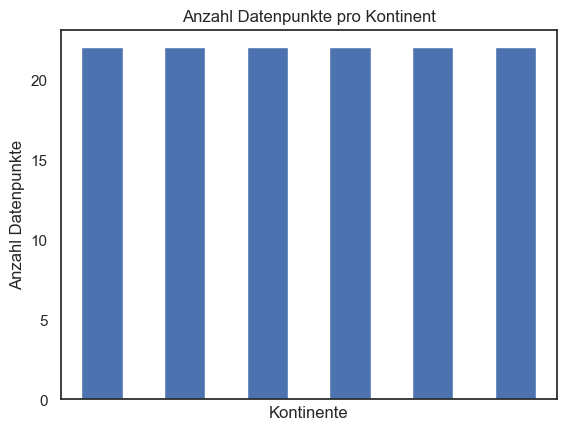

In [571]:
df_continents['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],   
                                 xlabel='Kontinente', ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Kontinent')

### 3.2 Analyse Jahre

In [572]:
# Datenpunkte_Jahr
print('Anzahl Datenpunkte der Jahre: ', len(df_continents['Jahr'].unique()))

Anzahl Datenpunkte der Jahre:  22


In [573]:
# Anzahl Datenpunkte pro Jahr
df_continents['Jahr'].value_counts()

Jahr
2000    6
2001    6
2020    6
2019    6
2018    6
2017    6
2016    6
2015    6
2014    6
2013    6
2012    6
2011    6
2010    6
2009    6
2008    6
2007    6
2006    6
2005    6
2004    6
2003    6
2002    6
2021    6
Name: count, dtype: int64

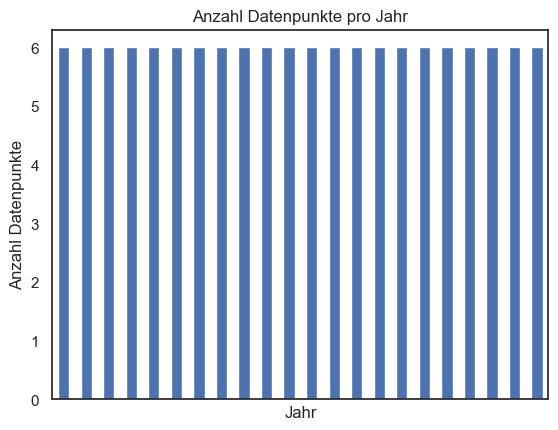

In [574]:
# Anzahl Datenpunkte pro Jahr
df_continents['Jahr'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');

### 3.3 Analyse Sterberate

In [575]:
print('Anzahl verschiedener Sterberate_drogenkonsum: ', len(df_continents['Sterberate_drogenkonsum'].unique()))

Anzahl verschiedener Sterberate_drogenkonsum:  132


In [576]:
# Anzahl Datenpunkte pro Jahr
df_continents['Sterberate_drogenkonsum'].value_counts().sort_index()


Sterberate_drogenkonsum
1.015446     1
1.023400     1
1.024833     1
1.024987     1
1.028038     1
            ..
16.142710    1
16.263073    1
16.404879    1
21.376522    1
24.205437    1
Name: count, Length: 132, dtype: int64

### 3.4 Analyse ganzer Datensatz

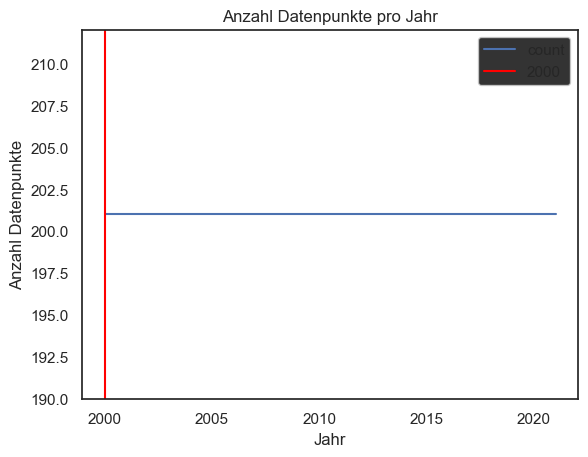

In [577]:
# Datenpunkte von ganzen Datensatz dt_orig
g = df_orig['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=2000, color='red',label='2000') 
g.legend()  

### 3.5 Analyse der Sterberate bei Alkohol- und Drogenkonsum

In [578]:
# Analyse Todesfälle bei Drogenkonsum
df_continents.describe()

,Jahr,Sterberate_drogenkonsum
count,132.000000,132.000000
mean,2010.500000,5.608987
std,6.368458,5.083372
min,2000.000000,1.015446
25%,2005.000000,1.847961
50%,2010.500000,3.117411
75%,2016.000000,9.487532
max,2021.000000,24.205437


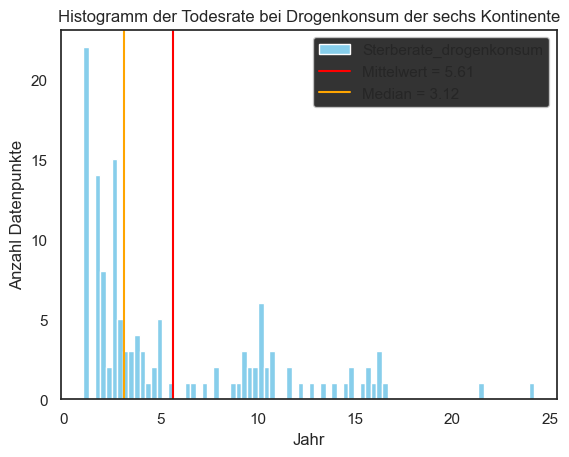

In [579]:
g = df_continents['Sterberate_drogenkonsum'].plot(kind='hist', bins=80, title='Histogramm der Todesrate bei Drogenkonsum der sechs Kontinente', 
                           xlabel='Jahr', ylabel='Anzahl Datenpunkte', color= 'skyblue')
mean = df_continents['Sterberate_drogenkonsum'].mean()
g.axvline(x=df_continents['Sterberate_drogenkonsum'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rot: Mittelwert

median = df_continents['Sterberate_drogenkonsum'].median()
g.axvline(x=df_continents['Sterberate_drogenkonsum'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange: Median

g.legend()

## 4. Analyse 

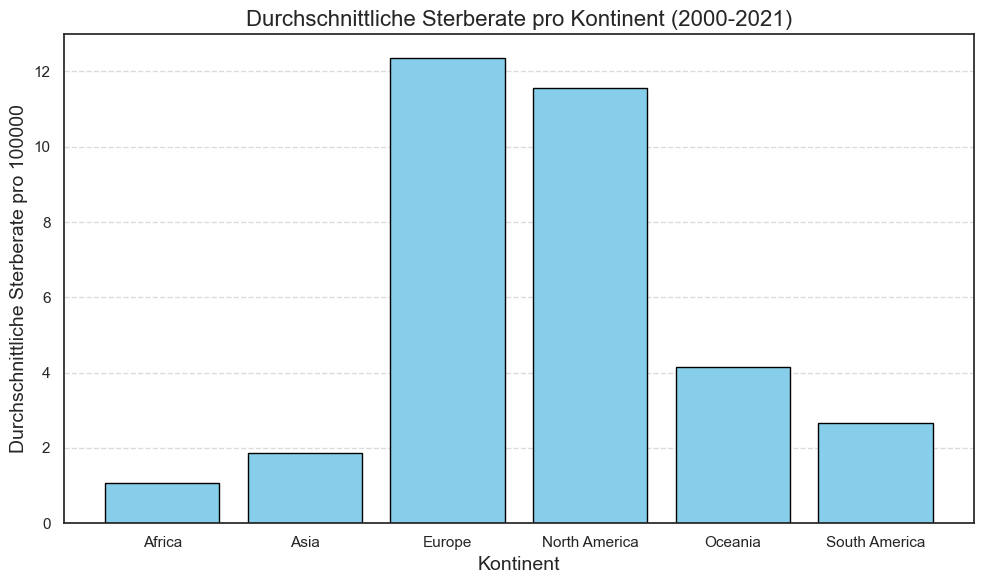

In [580]:
kontinente = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

avg_sterberate = df_pivot.loc[kontinente].mean(axis=1)

plt.figure(figsize=(10, 6))
plt.bar(avg_sterberate.index, avg_sterberate.values, color='skyblue', edgecolor='black')

plt.title("Durchschnittliche Sterberate pro Kontinent (2000-2021)", fontsize=16)
plt.xlabel("Kontinent", fontsize=14)
plt.ylabel("Durchschnittliche Sterberate pro 100000", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


### Berechnungen

In [581]:
diffs = df_pivot[2021]-df_pivot[2000]  
diffs = diffs.sort_values().dropna() 
diffs

Gebiet
Europe           -4.759307
Oceania          -0.898075
Asia             -0.287804
Africa            0.187856
South America     0.531835
North America    17.775448
dtype: float64

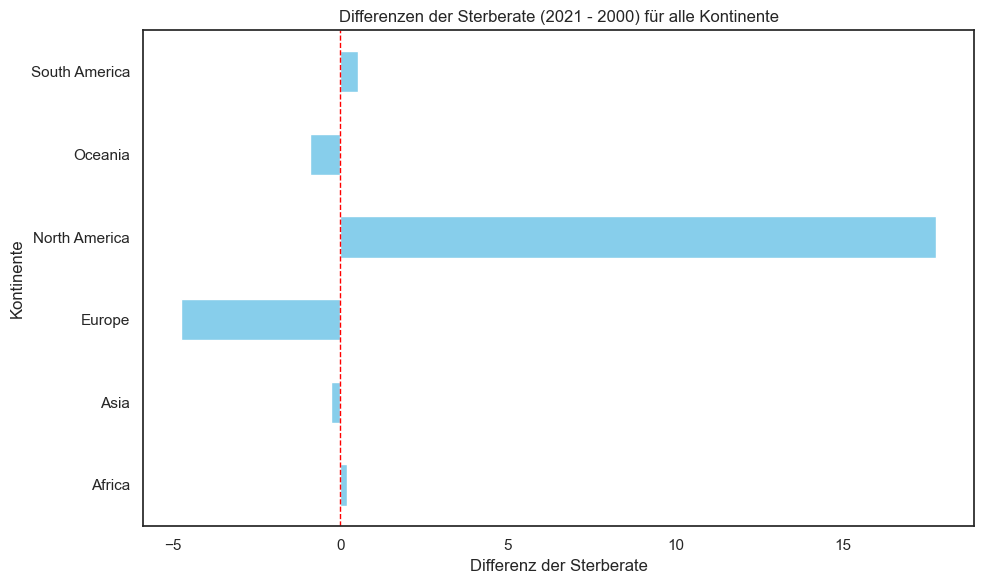

In [582]:
diffs = df_pivot[2021] - df_pivot[2000]  

plt.figure(figsize=(10, 6))
diffs.plot(kind='barh', color='skyblue', title='Differenzen der Sterberate (2021 - 2000) für alle Kontinente')

plt.xlabel("Differenz der Sterberate")
plt.ylabel("Kontinente")

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()

plt.show()

### Die aussagekräftigsten Jahresvergleiche

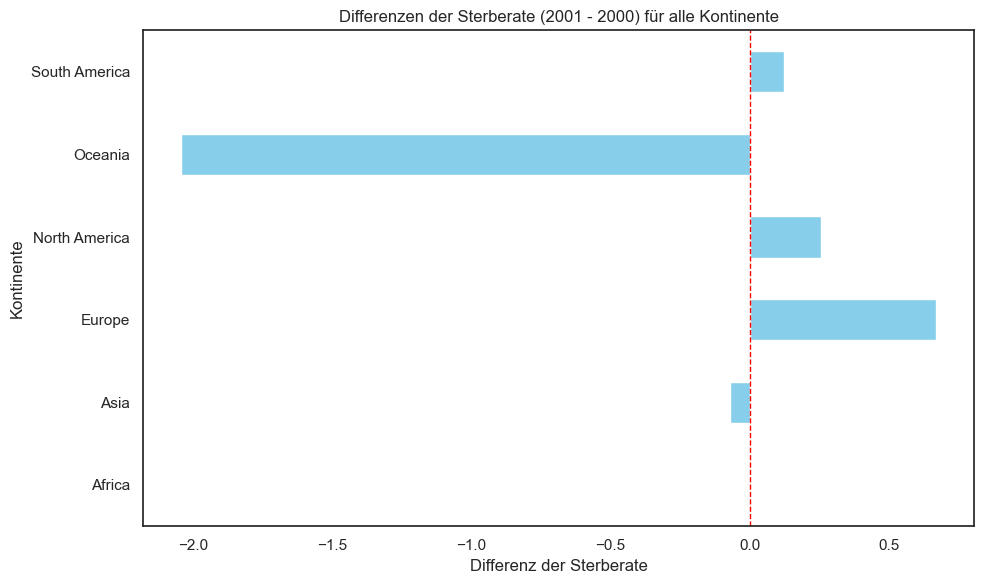

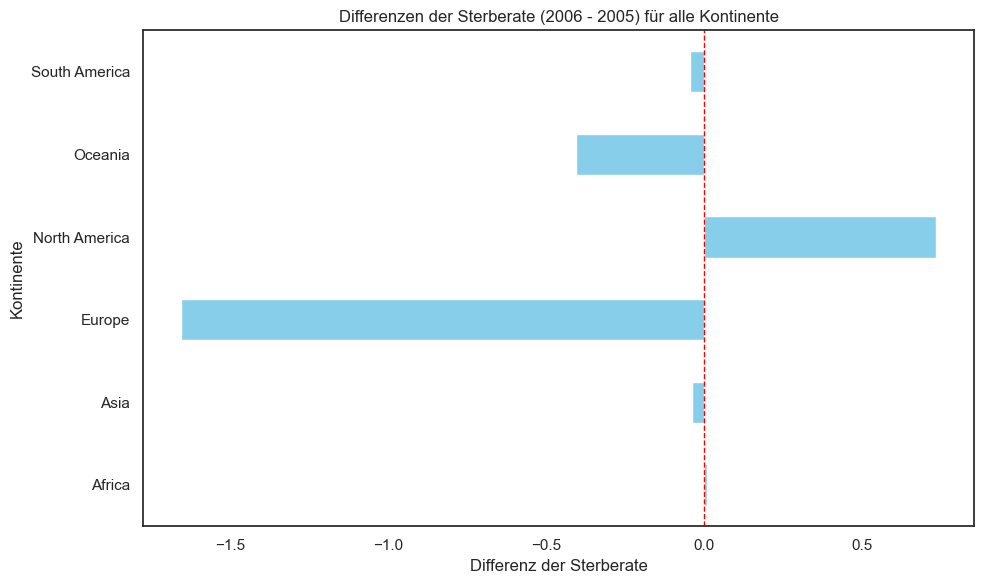

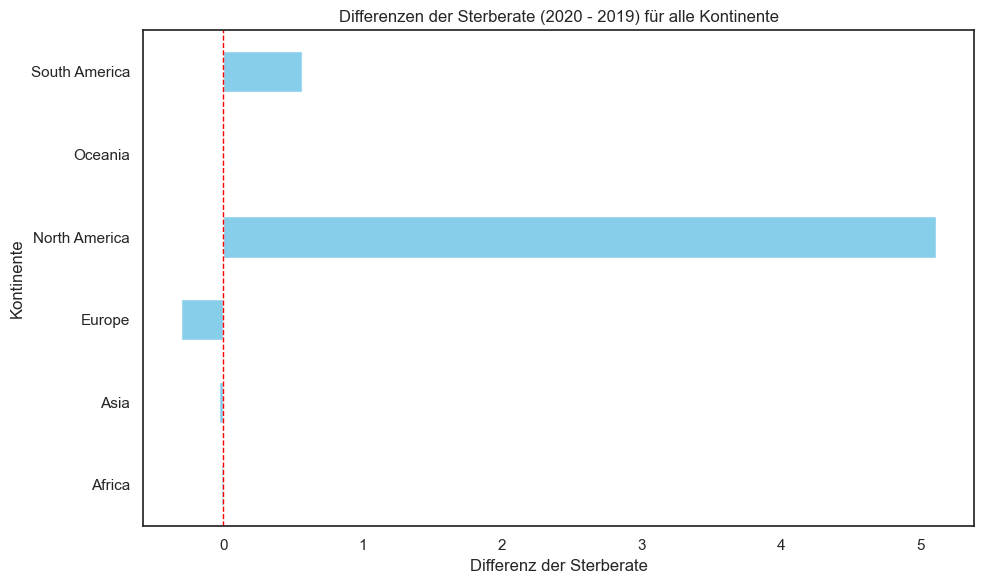

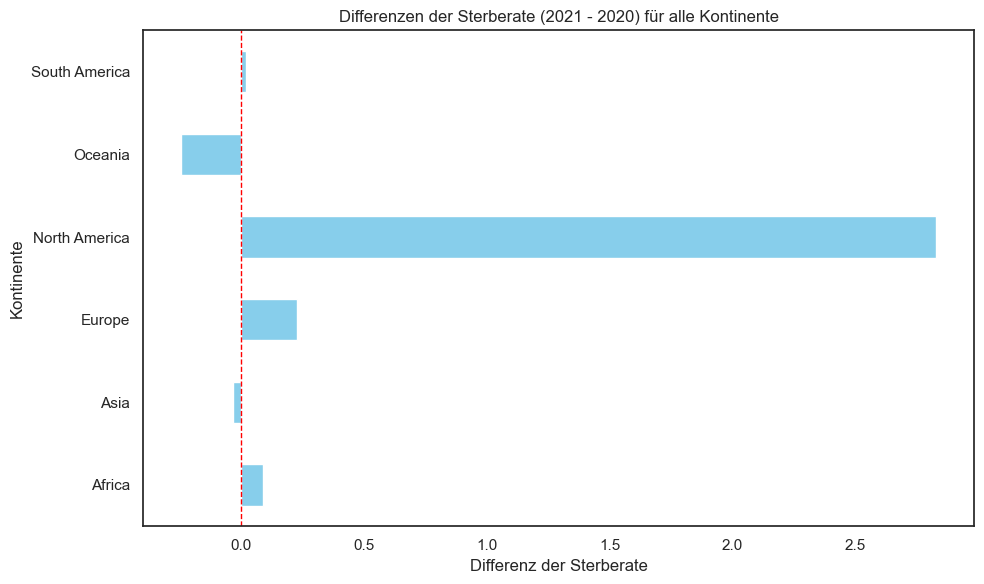

In [583]:
#2000-2001
diffs = df_pivot[2001] - df_pivot[2000] 

plt.figure(figsize=(10, 6))
diffs.plot(kind='barh', color='skyblue', title='Differenzen der Sterberate (2001 - 2000) für alle Kontinente')

plt.xlabel("Differenz der Sterberate")
plt.ylabel("Kontinente")

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()

plt.show()


#2005-2006
diffs = df_pivot[2006] - df_pivot[2005]

plt.figure(figsize=(10, 6))
diffs.plot(kind='barh', color='skyblue', title='Differenzen der Sterberate (2006 - 2005) für alle Kontinente')

plt.xlabel("Differenz der Sterberate")
plt.ylabel("Kontinente")

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()

plt.show()


#2019-2020
diffs = df_pivot[2020] - df_pivot[2019]

plt.figure(figsize=(10, 6))
diffs.plot(kind='barh', color='skyblue', title='Differenzen der Sterberate (2020 - 2019) für alle Kontinente')

plt.xlabel("Differenz der Sterberate")
plt.ylabel("Kontinente")

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()

plt.show()

#2020-2021
diffs = df_pivot[2021] - df_pivot[2020]

plt.figure(figsize=(10, 6))
diffs.plot(kind='barh', color='skyblue', title='Differenzen der Sterberate (2021 - 2020) für alle Kontinente')

plt.xlabel("Differenz der Sterberate")
plt.ylabel("Kontinente")

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()

plt.show()


### Visualisierungen

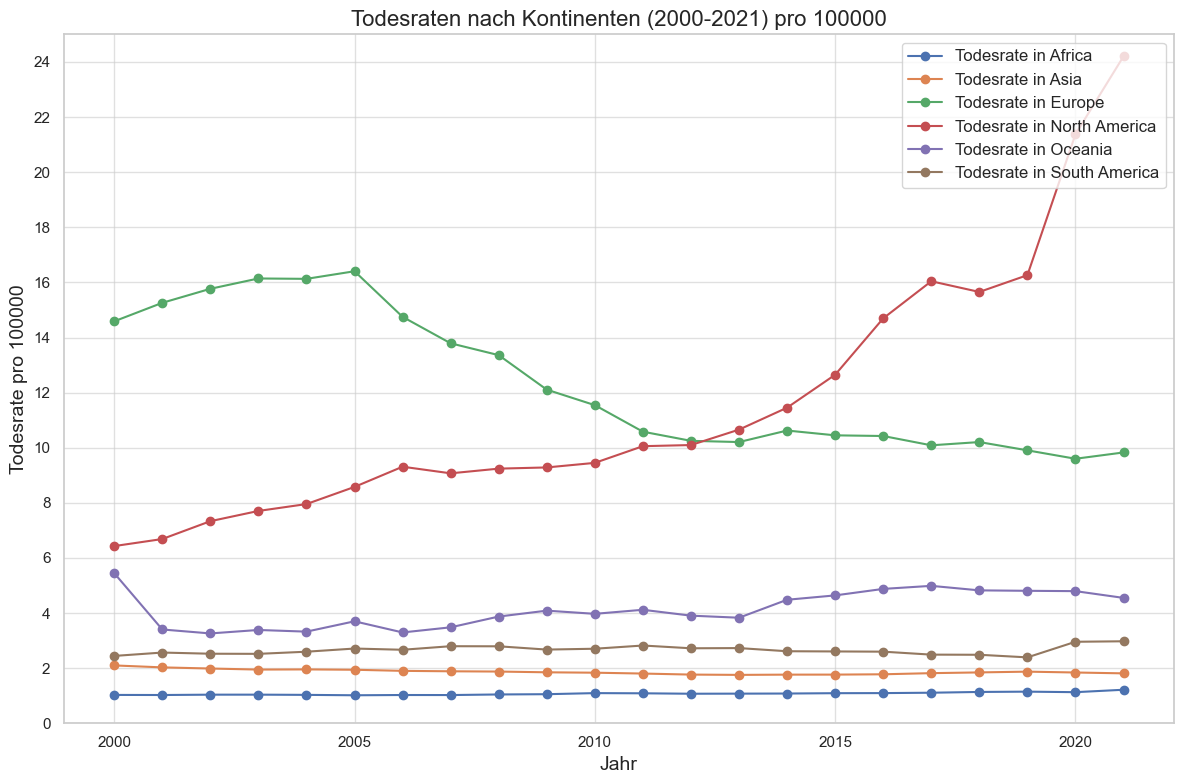

In [584]:
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']


plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  

for continent in continents:
    if continent in df_pivot.index:  
        data = df_pivot.loc[[continent]].T.reset_index()
        data.columns = ['Jahr', 'Sterberate']
        plt.plot(
            data['Jahr'], 
            data['Sterberate'], 
            marker='o', 
            label=f"Todesrate in {continent}"
        )
    else:
        print(f"Warnung: '{continent}' wurde nicht im Index gefunden.")


plt.title("Todesraten nach Kontinenten (2000-2021) pro 100000", fontsize=16)
plt.xlabel("Jahr", fontsize=14)
plt.ylabel("Todesrate pro 100000", fontsize=14)

plt.ylim(0, 25)  
plt.yticks(np.arange(0, 25, 2))  

plt.legend(fontsize=12, loc="upper right")
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

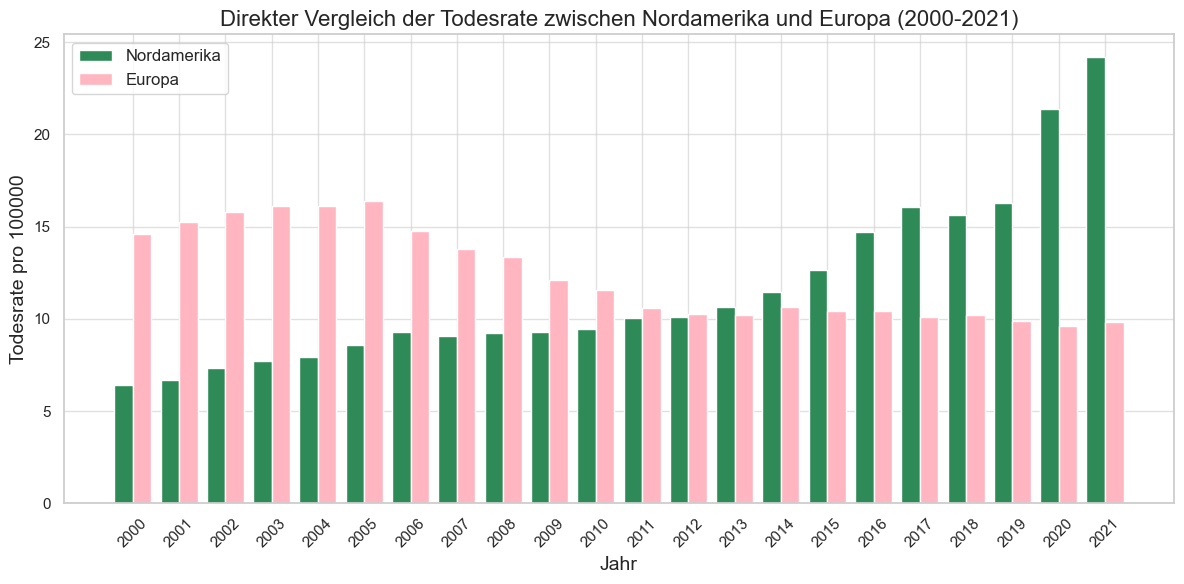

In [585]:

northamerica = df_pivot.loc[['North America']]

europe = df_pivot.loc[['Europe']]

northamerica_data = northamerica.T.reset_index()
northamerica_data.columns = ['Jahr', 'Sterberate_NA']

europe_data = europe.T.reset_index()
europe_data.columns = ['Jahr', 'Sterberate_EU']

comparison_data = pd.merge(northamerica_data, europe_data, on='Jahr')

plt.figure(figsize=(12, 6))

plt.bar(comparison_data['Jahr'] - 0.2, comparison_data['Sterberate_NA'], width=0.4, label='Nordamerika', color='seagreen', align='center')
plt.bar(comparison_data['Jahr'] + 0.2, comparison_data['Sterberate_EU'], width=0.4, label='Europa', color='lightpink', align='center')

plt.title('Direkter Vergleich der Todesrate zwischen Nordamerika und Europa (2000-2021)', fontsize=16)
plt.xlabel('Jahr', fontsize=14)
plt.ylabel('Todesrate pro 100000', fontsize=14)

plt.legend(fontsize=12)

plt.xticks(comparison_data['Jahr'], rotation=45)

plt.grid(True, alpha=0.6)

plt.tight_layout()
plt.show()


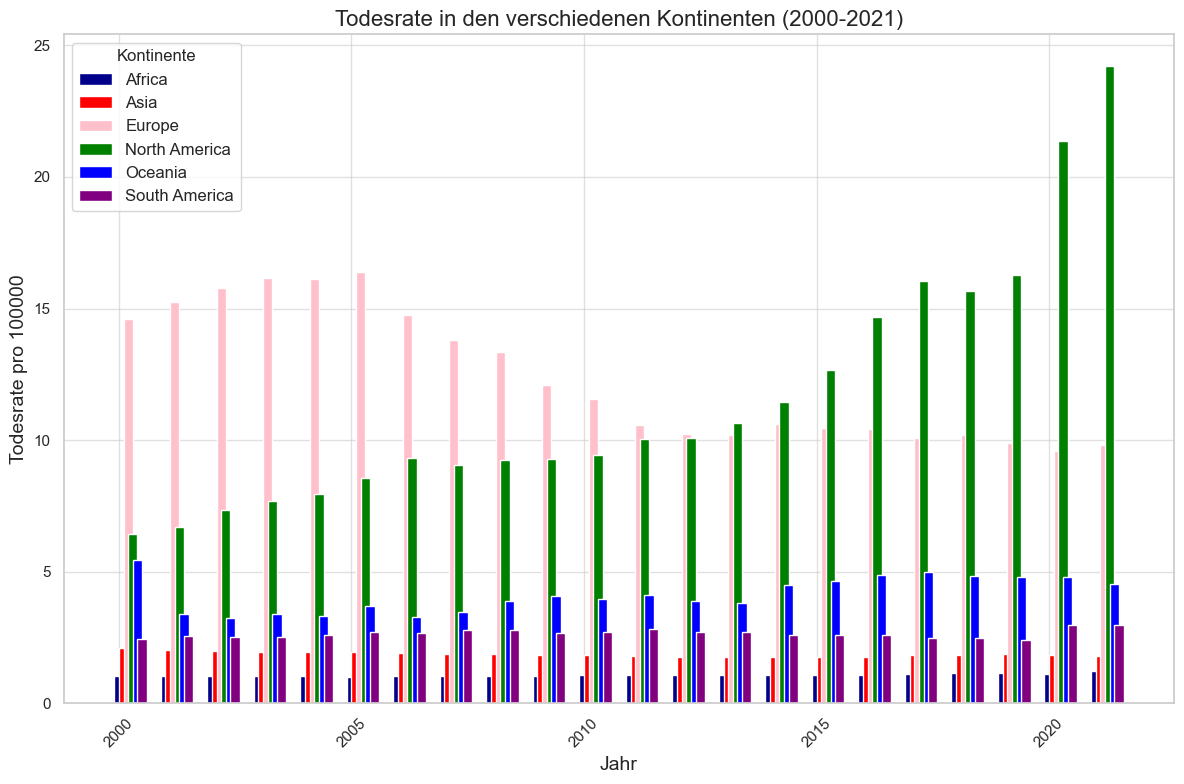

In [586]:

regions = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

sns.set_palette("cubehelix")

region_colors = {
    'Europe': 'pink',            
    'North America': 'green',    
    'Oceania': 'blue',           
    'South America': 'purple',   
    'Asia': 'red',               
    'Africa': 'darkblue'         
}

plt.figure(figsize=(12, 8))

for i, region in enumerate(regions):
    region_data = df_pivot.loc[[region]].T.reset_index()
    region_data.columns = ['Jahr', 'Sterberate']
    color = region_colors.get(region, None)  
    plt.bar(region_data['Jahr'] + i * 0.1, region_data['Sterberate'], width=0.2, label=region, color=color)

plt.title("Todesrate in den verschiedenen Kontinenten (2000-2021)", fontsize=16)
plt.xlabel("Jahr", fontsize=14)
plt.ylabel("Todesrate pro 100000", fontsize=14)

plt.legend(title='Kontinente', fontsize=12)

plt.grid(True, alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Daten mit Flipper Length:
          Gebiet  Flipper Length
0         Africa             218
1           Asia             208
2         Europe             194
3  North America             187
4        Oceania             200


/var/folders/mv/946h_4k52ddfg7yngb1mg8240000gn/T/ipykernel_13918/683302045.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_continents, x='Gebiet', y='Flipper Length', palette="viridis")


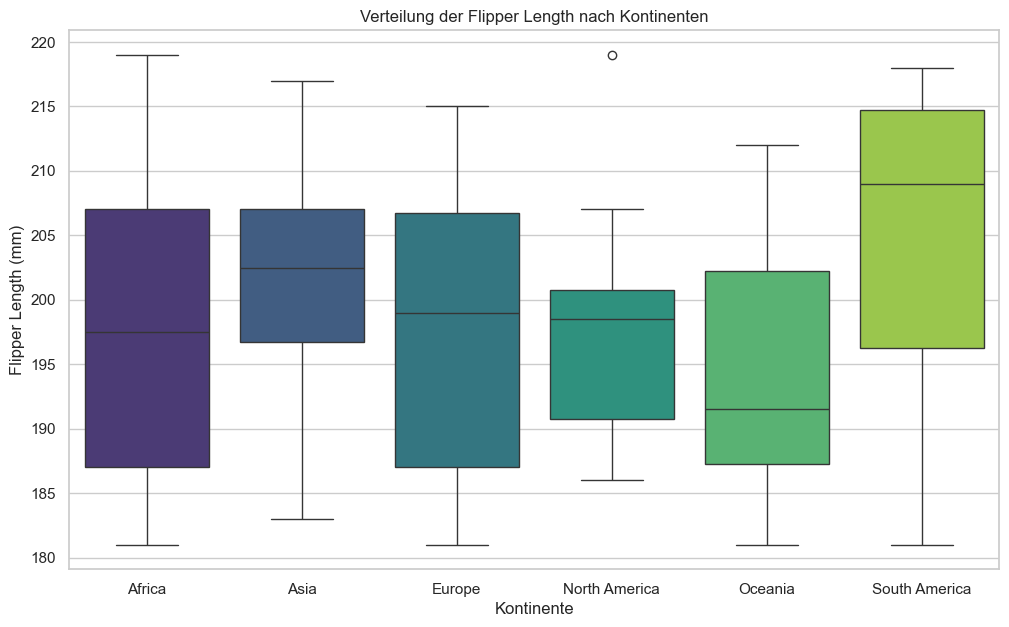

In [587]:

data = {'Gebiet': ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"] * 10}
df_orig = pd.DataFrame(data)


np.random.seed(42)  
df_orig['Flipper Length'] = np.random.randint(180, 220, size=len(df_orig))


print("Daten mit Flipper Length:")
print(df_orig.head())

continents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]
df_continents = df_orig[df_orig['Gebiet'].isin(continents)]


df_continents = df_continents.dropna(subset=['Flipper Length', 'Gebiet'])


plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")


sns.boxplot(data=df_continents, x='Gebiet', y='Flipper Length', palette="viridis")


plt.title("Verteilung der Flipper Length nach Kontinenten")
plt.xlabel("Kontinente")
plt.ylabel("Flipper Length (mm)")


plt.show()


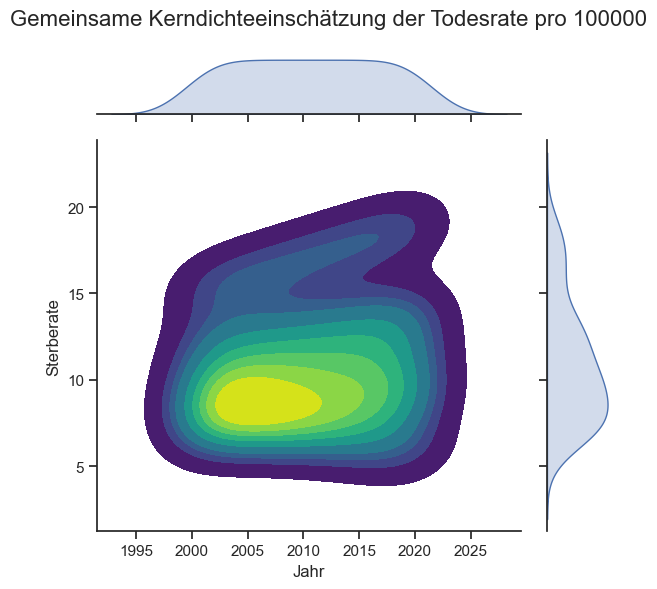

In [588]:

data = {
    'Jahr': list(range(2000, 2022)),
    'Africa': [10 + i * 0.1 for i in range(22)],
    'Asia': [15 + i * 0.2 for i in range(22)],
    'Europe': [8 - i * 0.1 for i in range(22)],
    'North America': [9 + i * 0.05 for i in range(22)],
    'Oceania': [7 + i * 0.08 for i in range(22)],
    'South America': [12 + i * 0.1 for i in range(22)]
}

df = pd.DataFrame(data)
df_pivot = df.set_index('Jahr')  

regions = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
region_colors = {
    'Europe': 'pink',
    'North America': 'green',
    'Oceania': 'blue',
    'South America': 'purple',
    'Asia': 'red',
    'Africa': 'darkblue'
}

df_pivot.reset_index(inplace=True)
df_melted = df_pivot.melt(id_vars=['Jahr'], var_name='Region', value_name='Sterberate')

kde_data = df_melted[['Jahr', 'Sterberate']]


sns.set_theme(style="ticks")
g = sns.jointplot(
    data=kde_data,
    x='Jahr',
    y='Sterberate',
    kind='kde',
    fill=True,
    cmap="viridis"
)

g.fig.suptitle("Gemeinsame Kerndichteeinschätzung der Todesrate pro 100000", fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9) 

plt.show()


### Facettendarstellung der Todesrate 2000-2021

/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packa

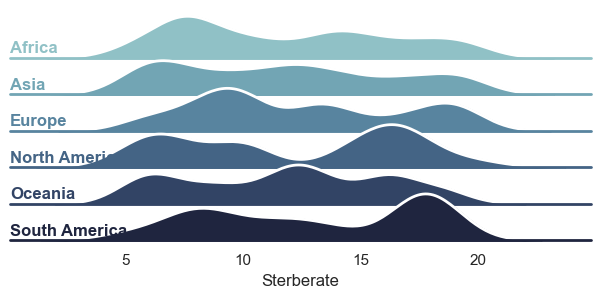

In [589]:


sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

regions = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
years = list(range(2000, 2022))
data = []

np.random.seed(42) 
for region in regions:
    for year in years:
        sterberate = np.random.uniform(5, 20)  
        data.append({'Region': region, 'Jahr': year, 'Sterberate': sterberate})

df = pd.DataFrame(data)

df['Jahr'] = df['Jahr'].astype(str)  
df['Region'] = df['Region'].astype("category")

pal = sns.cubehelix_palette(6, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Region", hue="Region", aspect=15, height=.5, palette=pal)

g.map(sns.kdeplot, "Sterberate", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Sterberate", clip_on=False, color="w", lw=2, bw_adjust=.5)


g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Sterberate")


g.figure.subplots_adjust(hspace=-.25)


g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()


## 5. Interpretation

### 5.1 Hypothesen zu den Ergebnissen
#### Wirtschaftliche Faktoren
In Regionen mit hohem Einkommensniveau und niedriger Arbeitslosenrate, wie es beispielsweise in Teilen Ozeaniens und Europas der Fall ist, zeigt sich eine auffällige Korrelation zu erhöhten Raten von alkohol- und drogenbedingten Todesfällen. Der wirtschaftliche Wohlstand und die damit einhergehende Sicherheit können paradoxerweise zu einem gesteigerten Leistungsdruck und psychischen Belastungen führen. In diesen Gesellschaften nutzen Menschen vermehrt Alkohol und Drogen als Bewältigungsmechanismus, um mit den Herausforderungen des modernen Lebens umzugehen. Die Studienergebnisse legen nahe, dass dies langfristig zu einer höheren Prävalenz von Abhängigkeiten und letztlich zu einer erhöhten Sterblichkeitsrate führen kann.
#### Soziale Faktoren
Soziale Ungleichheit und niedriger Bildungsstand sind bedeutende Einflussfaktoren auf die Sterberaten durch Substanzmissbrauch. Dies trifft besonders auf Regionen wie Teile Afrikas und Südamerikas zu, wo Korruption, Instabilität und ungleiche Bildungschancen vorherrschen. Ein niedriger Bildungsstand fördert den Mangel an Bewusstsein über die Risiken von Drogen- und Alkoholkonsum, während soziale Ungleichheit und Perspektivlosigkeit den Substanzmissbrauch als Fluchtmechanismus begünstigen können. Menschen in benachteiligten sozialen Verhältnissen haben häufig weniger Zugang zu Informationen und Ressourcen, die bei der Prävention von Abhängigkeit hilfreich wären.
#### Gesundheitsversorgung
Ein weiterer entscheidender Faktor ist die Verfügbarkeit und Qualität von Gesundheitsdiensten. Regionen wie Nordamerika, die mit der Fentanylkrise und Schwächen im Gesundheitssystem zu kämpfen haben, zeigen besonders hohe Sterblichkeitsraten. Viele Menschen haben keinen Zugang zu Krankenversicherungen oder bezahlbaren Suchtbehandlungen, was die Möglichkeit, effektive Hilfe zu erhalten, stark einschränkt. Im Gegensatz dazu konnten europäische Staaten durch gezielte Maßnahmen wie den EU-Drogenaktionsplan, der die Koordination und internationale Zusammenarbeit im Gesundheitsbereich stärkte, die Todesraten signifikant reduzieren. Dies verdeutlicht, dass der Ausbau von Behandlungsangeboten und ein gut funktionierendes Gesundheitssystem entscheidend zur Senkung der Sterblichkeit beitragen.
#### Geografische Faktoren
Geografische und regionale Gegebenheiten beeinflussen die Todesraten durch Substanzmissbrauch stark. In urbanisierten Regionen, wie vielen Städten in Nordamerika und Europa, gibt es zwar besseren Zugang zu Gesundheits- und Behandlungsangeboten, jedoch auch vermehrten Stress, soziale Isolation und leichten Zugang zu Drogen und Alkohol. Dies kann die Missbrauchsraten deutlich steigern. In ländlichen oder strategisch wichtigen Regionen, wie dem Senegal in Afrika oder dem Goldenen Dreieck in Asien, begünstigen geostrategische Faktoren wie Drogenschmuggel die Verbreitung illegaler Substanzen und somit auch die Todesfälle. Gleichzeitig führen in Südamerika und Ozeanien spezifische geografische Bedingungen und Schmuggelrouten zu erheblichen Schwankungen in den Sterberaten, die eng mit der Verfügbarkeit und Verbreitung von Drogen verknüpft sind.
### 5.2 Entwicklungsbeobachtung in Bezug auf die Hypothese
#### Entwicklung in Afrika
Seit Beginn der Pandemie ist in Afrika ein deutlicher Anstieg der Todesfälle aufgrund von Drogen- und Alkoholkonsum zu beobachten. Allerdings zeigt sich dieser Anstieg nicht erst seit der Pandemie: Bereits seit den frühen 2000er Jahren ist ein nahezu kontinuierlicher Zuwachs zu verzeichnen. Eine zentrale Ursache für diese Entwicklung ist das weit verbreitete hohe Mass an Korruption in vielen afrikanischen Staaten. Insbesondere das Drogengeschäft spielt hier eine entscheidende Rolle, da es mit enormen finanziellen Gewinnen verbunden ist.
Die geostrategische Lage des Senegals ist ein weiterer wichtiger Faktor: Das Land hat sich zu einem zentralen Transitpunkt für den Drogenschmuggel entwickelt. Lateinamerikanische Kartelle nutzen diese Route, um Drogen nach Europa und darüber hinaus zu transportieren. Diese geografische Gegebenheit in Kombination mit der instabilen politischen Situation und Korruption begünstigt das Aufblühen des illegalen Drogenmarkts und trägt somit zur Zunahme von Drogenmissbrauch und den damit verbundenen Todesfällen bei.
#### Entwicklung in Asien
In Asien zeigt sich ein Rückgang der drogenbedingten Todesfälle, was primär auf umfassende Drogenreduktionskampagnen zurückgeführt werden kann. Dennoch gab es im Jahr 2019 einen signifikanten Höhepunkt bei den Todeszahlen. Dieser Peak ist vor allem darauf zurückzuführen, dass der Drogenhandel in den Jahren zuvor zugenommen hat. Besonders aus dem sogenannten "Goldenen Dreieck" – einer Region zwischen Myanmar, Laos und Thailand – werden Drogen in großer Menge produziert und weltweit verschifft.
Die immensen Gewinne, die aus dem Drogenhandel resultieren, übersteigen die Ertragskraft vieler regulärer Wirtschaftszweige, was die Bekämpfung des Problems erheblich erschwert. Hinzu kommen instabile politische Verhältnisse in Teilen der Region, die es den Regierungen erschweren, effektive Kontrollmechanismen zu implementieren. Trotz aller Herausforderungen zeigen die Drogenreduktionsprogramme erste Erfolge, was den allgemeinen Rückgang der Todeszahlen erklären könnte.
#### Entwicklung in Europa
In Europa war im Jahr 2005 ein auffälliger Höhepunkt der drogenbedingten Todesraten zu verzeichnen, gefolgt von einem sinkenden Trend in den darauffolgenden Jahren. Ein wesentlicher Faktor für diesen Rückgang ist der EU-Drogenaktionsplan, der als Teil der europäischen Drogenstrategie umgesetzt wurde.
Die Ziele des EU-Drogenaktionsplans waren vor allem die Reduzierung von Nachfrage und Angebot illegaler Substanzen, die Verbesserung der Koordination innerhalb der Drogenpolitik sowie die Förderung der internationalen Zusammenarbeit. Durch gezielte Maßnahmen wie Präventionsprogramme, strengere Kontrollen und bessere Behandlungsmöglichkeiten konnte die Zahl der drogenbedingten Todesfälle langfristig gesenkt werden.
#### Entwicklung in Nordamerika
Nordamerika verzeichnet seit dem Jahr 2000 einen dramatischen Anstieg der drogen- und alkoholbedingten Todesfälle. Ein entscheidender Grund dafür liegt im instabilen politischen System der Region, das direkt mit Schwächen im Gesundheitssystem verknüpft ist. Millionen von Menschen in den USA verfügen über keine Krankenversicherung und haben somit keinen Zugang zu medizinischer Versorgung oder therapeutischen Angeboten.
Dieser Mangel wurde während der SARS-COVID-Pandemie besonders deutlich: Die Sterblichkeitsrate aufgrund von Alkohol- und Drogenmissbrauch erreichte einen neuen Höchststand. Die schwierige wirtschaftliche Lage, ansteigende Arbeitslosigkeit und vermehrte psychische Erkrankungen wie Depressionen führten dazu, dass viele Menschen vermehrt zu Suchtmitteln griffen. Hinzu kommt die sogenannte Fentanylkrise, die seit 2020 einen massiven Einfluss auf die Todesraten hat. Fentanyl, ein extrem starkes synthetisches Opioid, hat zu einer explosionsartigen Zunahme von Überdosierungen geführt und verschärft die ohnehin dramatische Situation in der Region.
#### Entwicklung in Ozeanien
In Ozeanien, insbesondere in wohlhabenden und hochentwickelten Industrieländern wie Australien und Neuseeland, zeigt sich eine wechselhafte Entwicklung der drogenbedingten Todesraten. Ein möglicher Erklärungsansatz ist der hohe Konsum von Drogen in wirtschaftlich starken Staaten sowie in Regionen, die als Herstellungsorte für Rauschmittel fungieren.
Darüber hinaus spielt der Drogenschmuggel in der Inselregion eine bedeutende Rolle. Die geografische Lage Ozeaniens begünstigt Schmuggelaktivitäten, da die vielen abgelegenen Inseln schwer zu überwachen sind. Dies könnte das Auf und Ab der Todesraten erklären, da Veränderungen in den Schmuggelrouten oder in den staatlichen Kontrollmechanismen direkten Einfluss auf die Verfügbarkeit und den Konsum von Drogen haben.
#### Entwicklung in Südamerika
In Südamerika zeigt sich ein Anstieg der drogenbedingten Todesfälle zwischen 2019 und 2020, was höchstwahrscheinlich in Verbindung zur Fentanylkrise in Nordamerika steht. Ein zunehmender Trend ist das Strecken von Drogen wie Kokain und Heroin mit Carfentanyl. Diese synthetische Substanz, die ursprünglich zur Betäubung von großen Wildtieren wie Elefanten entwickelt wurde, ist extrem gefährlich: Bereits kleinste Mengen können tödlich sein.
Carfentanyl ist etwa 50-mal stärker als Heroin und sogar 100-mal stärker als Morphin, was das Risiko einer Überdosierung drastisch erhöht. Der Handel und die Verbreitung solcher Substanzen in Südamerika sind eng mit den internationalen Drogenmärkten verknüpft, insbesondere mit dem Drogenschmuggel in Richtung Nordamerika und Europa. Diese Dynamik trägt maßgeblich zum Anstieg der drogenbedingten Todesfälle in der Region bei.




### Quellen
- https://www.ejinme.com/article/S0953-6205(19)30357-7/fulltext
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7189946/
- https://www.sciencedirect.com/science/article/pii/S0955395907002174
- https://www.thelancet.com/journals/lanpsy/article/PIIS2215-0366(18)30337-7/fulltext
- https://www.who.int/news-room/fact-sheets/detail/alcohol#:~:text=Worldwide%2C%20around%202.6%20million%20deaths,000%20deaths%20from%20communicable%20diseases
- https://de.statista.com/topics/100/drogen/#:~:text=Globaler%20Drogenkonsum%20nimmt%20zu&text=In%20den%20USA%2C%20dem%20Land,Sterbef%C3%A4lle%20je%20eine%20Million%20Einwohner
- https://eur-lex.europa.eu/DE/legal-content/summary/the-eu-drugs-action-plan-2005-08.html
- https://www.unodc.org/unodc/en/data-and-analysis/wdr-2022_booklet-4.html
- https://www.dw.com/de/drogen-in-lateinamerika-konkurrenz-f%C3%BCr-kokain/a-62553934
- https://www.dw.com/de/drogen-im-senegal-mehr-kokainhandel-weniger-lokaler-konsum/a-69193128
- https://www.zeit.de/wissen/gesundheit/2012-01/drogenmissbrauch-schaetzung-weltweit
- https://www.dw.com/de/s%C3%BCdostasien-wird-der-synthetischen-drogen-nicht-herr/a-53492119
